In [1]:
from pandas_datareader import data as wb 
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

In [2]:
ticker='PG'
pg=wb.DataReader(ticker,data_source='yahoo',start='1995-1-1')

In [3]:
mydata=pd.DataFrame()
mydata[ticker]=pg["Adj Close"]

In [4]:
tickers=['PG','MSFT','F','GE']
for t in tickers:
    mydata[t]=wb.DataReader(t,data_source='yahoo',start='1995-1-1')['Adj Close']
   

In [5]:
mydata.info
mydata.head(4)

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.166473,2.394761,4.380183,4.122630
1995-01-04,8.101009,2.412169,4.498034,4.122630
1995-01-05,7.986450,2.372380,4.458752,4.132737
1995-01-06,8.002816,2.412169,4.458752,4.112525


In [6]:
mydata.loc['1995-01-06']

PG      8.002816
MSFT    2.412169
F       4.458752
GE      4.112525
Name: 1995-01-06 00:00:00, dtype: float64

In [7]:
newData=mydata/mydata.iloc[0]*100
newData.head(4)

,PG,MSFT,F,GE
Date,,,,
1995-01-03,100.000000,100.000000,100.000000,100.000000
1995-01-04,99.198381,100.726916,102.690545,100.000000
1995-01-05,97.795582,99.065425,101.793736,100.245172
1995-01-06,97.995987,100.726916,101.793736,99.754898


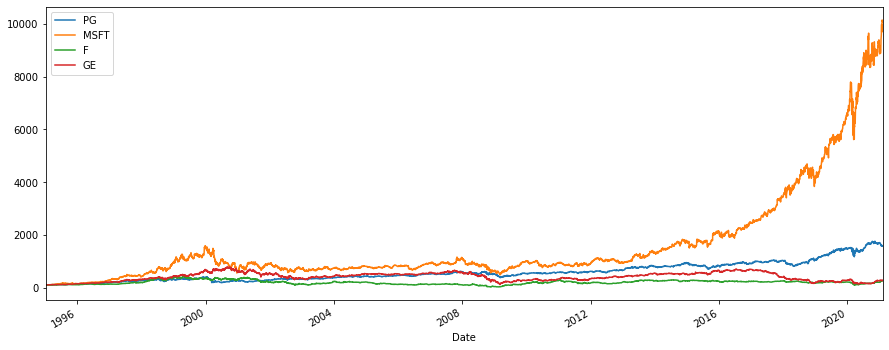

In [8]:
newData.plot(figsize=(15,6))
plot.show()

<AxesSubplot:xlabel='Date'>

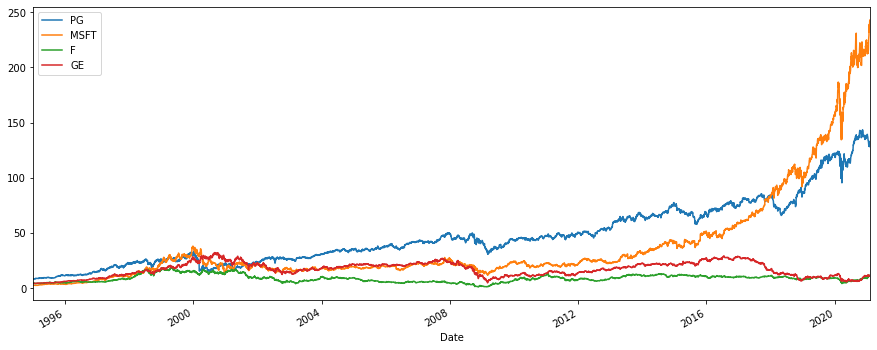

In [9]:
mydata.plot(figsize=(15,6))

## Calculating Return of a portfolio of securities

In [10]:
returns = (mydata/mydata.shift(1))-1
returns.head(4)

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026905,0.000000
1995-01-05,-0.014141,-0.016495,-0.008733,0.002452
1995-01-06,0.002049,0.016772,0.000000,-0.004891


In [11]:
weight=[0.25,0.25,0.25,0.25]

A=np.array([[1,2,3],[4,5,6]])
B=np.array([[7,8],[9,10],[11,12]])

In [12]:
A

array([[1, 2, 3],
       [4, 5, 6]])

In [13]:
B

array([[ 7,  8],
       [ 9, 10],
       [11, 12]])

In [14]:
np.dot(A,B)

array([[ 58,  64],
       [139, 154]])

In [15]:
C=np.array([[10,20,30,40],[50,60,70,80],[90,100,110,120]])

In [16]:
D=np.array([1,2,3,4])

In [17]:
D

array([1, 2, 3, 4])

In [18]:
np.dot(C,D)

array([ 300,  700, 1100])

In [19]:
C

array([[ 10,  20,  30,  40],
       [ 50,  60,  70,  80],
       [ 90, 100, 110, 120]])

In [20]:
weight

[0.25, 0.25, 0.25, 0.25]

In [21]:
returns.head(4)

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026905,0.000000
1995-01-05,-0.014141,-0.016495,-0.008733,0.002452
1995-01-06,0.002049,0.016772,0.000000,-0.004891


In [22]:
weights=np.array([0.25,0.25,0.25,0.25])

In [23]:
np.dot(returns, weights)

array([        nan,  0.0065396 , -0.00922944, ...,  0.00851158,
        0.00322914, -0.00411579])

In [33]:
annual_returns=returns.mean()*250

In [34]:
annual_returns

PG      0.130392
MSFT    0.225485
F       0.115967
GE      0.090259
dtype: float64

In [35]:
np.dot(annual_returns,weights)

0.14052593793813914

In [46]:
pfolio_l=str(round(np.dot(annual_returns,weights)*100,3))+"%"
pfolio_l

'14.053%'

In [47]:
weights=np.array([0.4,0.4,0.15,0.05])

In [48]:
np.dot(annual_returns,weights)

0.16425904113520465

In [52]:
profolio_2=str(round(np.dot(annual_returns,weights)*100,3))+"%"
profolio_2

'16.426%'